# scikit-learn Tutorial (Part 1 - Regression)

<img src="https://raw.githubusercontent.com/arad1367/UniLi_sources/main/IMG/logo.jpg"
     alt="University of Liechtenstein"
     width="350"
     height="auto">

### About This Tutorial

This tutorial is prepared by **Dr. Pejman Ebrahimi** for the "Deep Learning and Advanced AI Techniques" course at the University of Liechtenstein.

For more resources and notebooks related to this course, please visit Moodle or GitHub repository: [Course Materials](https://github.com/arad1367/University-of-Liechtenstein/tree/main/Deep%20Learning%20and%20Advanced%20AI).

You can reach out to Dr. Pejman Ebrahimi via email: [pejman.ebrahimi@uni.li](mailto:pejman.ebrahimi@uni.li).

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import math

import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import pickle
import joblib

### scikit-learn (Part 1) - Regression

- scikit-learn toy datasets & Real world datasets
- Problem definition
- Features and Target variables
- Data preprocessing
- Split data
- Select estimator (Model) and `get_params()`
- Fit the model with train dataset
- Accuracy Score
- Make Prediction
- Accuracy metrics `(r2, MSE, MAE)`
- Experiment and Hyperparameter tuning
- Save the best model
- Deployment

In [127]:
notebook_structure = {
    "Title": "scikit-learn (Part 1) - Regression",
    "Sections": {
        "1. Datasets": {
            "Description": "Explore scikit-learn datasets for regression problems.",
            "Subsections": {
                "Toy Dataset": "Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.",
                "Real-World Dataset": "California Housing (fetch_california_housing): A larger dataset for predicting median house prices."
            }
        },
        "2. Problem Definition": "Define the regression problem to be solved.",
        "3. Features and Target Variables": "Identify independent features (X) and the dependent target variable (y).",
        "4. Data Preprocessing & EDA": "Clean and prepare the data for modeling (e.g., handling missing values, scaling).",
        "5. Split Data": "Divide the dataset into training and testing subsets for model evaluation.",
        "6. Select Estimator (Model)": {
            "Description": "Choose an appropriate regression model from scikit-learn.",
            "Details": "Use `get_params()` to inspect the model's hyperparameters."
        },
        "7. Fit the Model with Train Dataset": "Train the selected model on the training data.",
        "8. Accuracy Score": "Evaluate the model's performance on the training set.",
        "9. Make Predictions": "Generate predictions on unseen (test) data.",
        "10. Accuracy Metrics": {
            "Description": "Assess model performance using key regression metrics.",
            "Metrics": ["R-squared (R2)", "Mean Squared Error (MSE)", "Mean Absolute Error (MAE)"]
        },
        "11. Experiment and Hyperparameter Tuning": "Experiment with different models and tune hyperparameters to improve performance.",
        "12. Save the Best Model Using `pickle`": {
            "Description": "Serialize and save the best-trained model to a file for reuse.",
            "Details": "Use Python's `pickle` library to save the model and verify its functionality by reloading it."
        },
        "13. Deploy the Model with a Simple Gradio App": {
            "Description": "Create a web-based interface to use the trained model for real-time predictions.",
            "Details": "Use Gradio to build an interactive app where users can input feature values and receive predictions."
        }
    }
}

![sklearn](https://raw.githubusercontent.com/arad1367/UniLi_sources/main/IMG/loop.png)

In [128]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 1. Explore scikit-learn Toy and Real-World Datasets for Regression Problems

In [88]:
# Reference: https://scikit-learn.org/stable/datasets/toy_dataset.html
#            https://scikit-learn.org/stable/datasets/real_world.html

"""
In this section, we will explore datasets provided by scikit-learn for regression problems.
scikit-learn offers two types of datasets:
    1. **Toy Datasets**: Small, built-in datasets designed for quick experimentation and learning.
    2. **Real-World Datasets**: Larger datasets fetched from external repositories, suitable for benchmarking and advanced experiments.

### Toy Datasets for Regression, for example:
    - Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.

### Real-World Datasets for Regression, for example:
    - California Housing (fetch_california_housing): A slightly larger dataset for predicting median house prices.

For this notebook, we will begin with the California Housing for more complex scenarios.
"""

'\nIn this section, we will explore datasets provided by scikit-learn for regression problems. \nscikit-learn offers two types of datasets:\n    1. **Toy Datasets**: Small, built-in datasets designed for quick experimentation and learning.\n    2. **Real-World Datasets**: Larger datasets fetched from external repositories, suitable for benchmarking and advanced experiments.\n\n### Toy Datasets for Regression, for example:\n    - Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.\n\n### Real-World Datasets for Regression, for example:\n    - California Housing (fetch_california_housing): A slightly larger dataset for predicting median house prices.\n\nFor this notebook, we will begin with the California Housing for more complex scenarios.\n'

In [89]:
california_dataset = fetch_california_housing()
california_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [129]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 2. Problem Definition: California Housing Dataset

In [38]:
"""
The California Housing dataset is a real-world dataset that contains information about housing prices
in various districts of California. The dataset includes features such as population, median income,
housing median age, and geographical location (latitude and longitude), among others.

### Problem Statement:
The goal is to build a regression model that predicts the **median house value** (target variable)
based on the provided features. This is a supervised learning problem where the target variable is continuous.

### Key Objectives:
1. **Understand the Data**: Analyze the features and their relationships with the target variable.
2. **Preprocess the Data**: Handle any missing values, scale features if necessary, and encode categorical variables.
3. **Train a Regression Model**: Use scikit-learn to train a model that accurately predicts house prices.
4. **Evaluate Model Performance**: Assess the model using metrics such as R-squared (R2), Mean Squared Error (MSE),
   and Mean Absolute Error (MAE).
5. **Improve Predictions**: Experiment with different models and hyperparameter tuning to enhance prediction accuracy.

### Practical Applications:
- Real estate valuation: Estimate property prices based on neighborhood and demographic data.
- Urban planning: Identify areas with undervalued or overvalued housing.
- Investment analysis: Support decision-making for real estate investors.

By solving this regression problem, we aim to create a robust predictive model that can generalize well
to unseen data and provide actionable insights into housing price trends.
"""

'\nThe California Housing dataset is a real-world dataset that contains information about housing prices \nin various districts of California. The dataset includes features such as population, median income, \nhousing median age, and geographical location (latitude and longitude), among others.\n\n### Problem Statement:\nThe goal is to build a regression model that predicts the **median house value** (target variable) \nbased on the provided features. This is a supervised learning problem where the target variable is continuous.\n\n### Key Objectives:\n1. **Understand the Data**: Analyze the features and their relationships with the target variable.\n2. **Preprocess the Data**: Handle any missing values, scale features if necessary, and encode categorical variables.\n3. **Train a Regression Model**: Use scikit-learn to train a model that accurately predicts house prices.\n4. **Evaluate Model Performance**: Assess the model using metrics such as R-squared (R2), Mean Squared Error (MSE),

In [130]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 3. Features and Target Variables

In [40]:
"""
In this section, we will separate the dataset into features (independent variables) and the target variable
(dependent variable). This step is crucial for training the regression model.

### Key Concepts:
- **Features (X)**: The input variables used to predict the target variable. These are also known as independent variables.
- **Target Variable (y)**: The output variable we aim to predict. This is also known as the dependent variable.

For the California Housing dataset:
- Features include attributes like `MedInc`, `HouseAge`, `AveRooms`, etc.
- The target variable is the `MedHouseVal` (median house value).

Let us create the feature matrix `X` and the target vector `y`.
"""

'\nIn this section, we will separate the dataset into features (independent variables) and the target variable \n(dependent variable). This step is crucial for training the regression model.\n\n### Key Concepts:\n- **Features (X)**: The input variables used to predict the target variable. These are also known as independent variables.\n- **Target Variable (y)**: The output variable we aim to predict. This is also known as the dependent variable.\n\nFor the California Housing dataset:\n- Features include attributes like `MedInc`, `HouseAge`, `AveRooms`, etc.\n- The target variable is the `MedHouseVal` (median house value).\n\nLet us create the feature matrix `X` and the target vector `y`.\n'

In [41]:
california_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [90]:
# Load the dataset into a DataFrame
df = pd.DataFrame(data=california_dataset["data"], columns=california_dataset["feature_names"])
print("Features (first 5 rows):\n", df.head())

# Define Features (X)
X = df  # Independent variables
print("\nFeature Matrix (X):\n", X[:10])  # Display first 10 rows of features

# Define Target Variable (y)
y = pd.DataFrame(data=california_dataset["target"], columns=["MedHouseVal"])  # Dependent variable
print("\nTarget Variable (y):\n", y[:10])  # Display first 10 rows of target

# Verify shapes of X and y
print("\nShape of Feature Matrix (X):", X.shape)
print("Shape of Target Variable (y):", y.shape)

Features (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25

Feature Matrix (X):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4  3.8462      52.0  6.28185

### 4. Data Preprocessing & EDA

In [43]:
"""
In this section, we will perform data preprocessing and exploratory data analysis (EDA) to understand
the California Housing dataset better. This step is crucial for identifying patterns, trends, and potential issues
in the data before building the regression model.

### Steps for Data Preprocessing and EDA:
1. **Check for Missing Values**: Ensure there are no missing or null values in the features (X) and target variable (y).
2. **Inspect Dataset Information**: Use `info()` to check data types, non-null counts, and memory usage.
3. **Summarize Statistical Properties**: Use `describe()` to analyze key statistics such as mean, median, min, max, etc.
4. **Visualize Data**: Create plots to explore relationships between features and the target variable.
"""

'\nIn this section, we will perform data preprocessing and exploratory data analysis (EDA) to understand \nthe California Housing dataset better. This step is crucial for identifying patterns, trends, and potential issues \nin the data before building the regression model.\n\n### Steps for Data Preprocessing and EDA:\n1. **Check for Missing Values**: Ensure there are no missing or null values in the features (X) and target variable (y).\n2. **Inspect Dataset Information**: Use `info()` to check data types, non-null counts, and memory usage.\n3. **Summarize Statistical Properties**: Use `describe()` to analyze key statistics such as mean, median, min, max, etc.\n4. **Visualize Data**: Create plots to explore relationships between features and the target variable.\n'

Missing Values in Features (X):
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing Values in Target Variable (y):
 MedHouseVal    0
dtype: int64

Dataset Information for Features (X):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB

Dataset Information for Target Variable (y):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #  

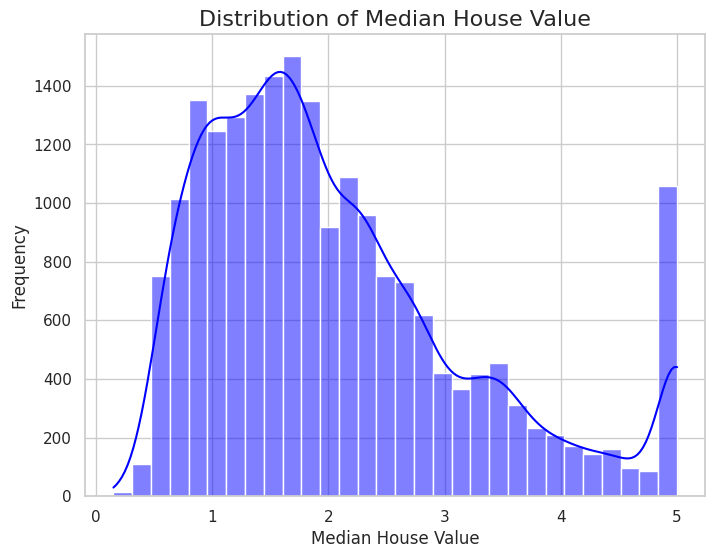

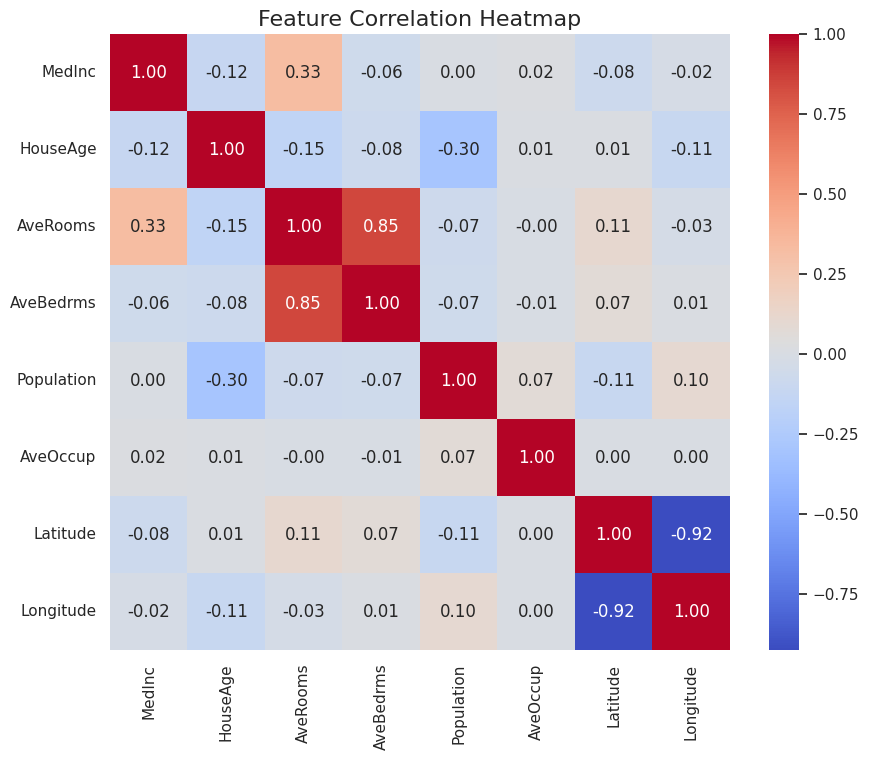

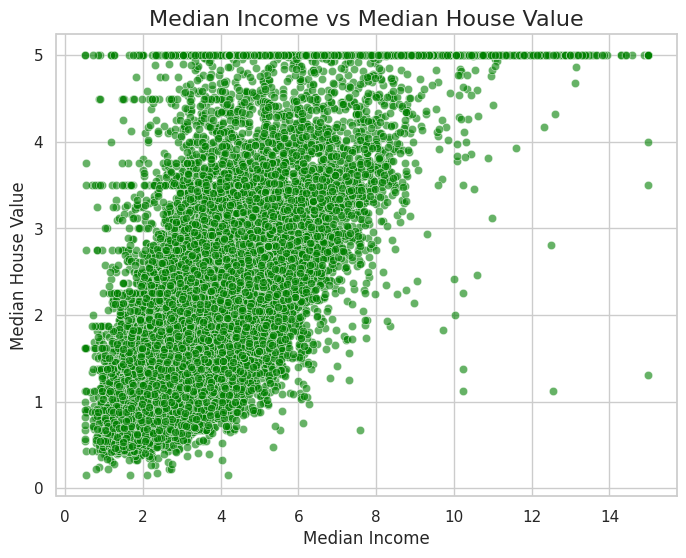

In [45]:
# Step 1: Check for Missing Values
print("Missing Values in Features (X):\n", X.isna().sum())
print("\nMissing Values in Target Variable (y):\n", y.isna().sum())

# Step 2: Inspect Dataset Information
print("\nDataset Information for Features (X):")
X.info()

print("\nDataset Information for Target Variable (y):")
y.info()

# Step 3: Summarize Statistical Properties
print("\nStatistical Summary for Features (X):\n", X.describe())
print("\nStatistical Summary for Target Variable (y):\n", y.describe())

# Step 4: Visualize Data for EDA
# Set plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of Target Variable (Median House Value)
plt.figure(figsize=(8, 6))
sns.histplot(y["MedHouseVal"], kde=True, bins=30, color="blue")
plt.title("Distribution of Median House Value", fontsize=16)
plt.xlabel("Median House Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Plot 2: Correlation Heatmap for Features
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# Plot 3: Scatter Plot of a Key Feature vs Target Variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["MedInc"], y=y["MedHouseVal"], alpha=0.6, color="green")
plt.title("Median Income vs Median House Value", fontsize=16)
plt.xlabel("Median Income", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)
plt.show()

In [131]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 5. Split data

In [53]:
# Split Data into Training and Testing Sets

"""
In this section, we will split the dataset into training and testing subsets.
This step is essential to evaluate the model's performance on unseen data and avoid overfitting.

### Key Concepts:
1. **Training Set**: Used to train the model.
2. **Testing Set**: Used to evaluate the model's performance on unseen data.
3. **Best Practices**:
   - Use a fixed random seed (`random_state`) for reproducibility.
   - Shuffle the data before splitting to ensure randomness.
   - Maintain the same proportion of target classes (if applicable) using stratification (not required here since it's regression).

We will demonstrate two approaches to splitting the data:
1. **Manual Splitting**: Divide the data based on a fixed percentage (e.g., 70% for training, 30% for testing).
2. **Using `train_test_split`**: A more robust and flexible method provided by scikit-learn.
"""


"\nIn this section, we will split the dataset into training and testing subsets. \nThis step is essential to evaluate the model's performance on unseen data and avoid overfitting.\n\n### Key Concepts:\n1. **Training Set**: Used to train the model.\n2. **Testing Set**: Used to evaluate the model's performance on unseen data.\n3. **Best Practices**:\n   - Use a fixed random seed (`random_state`) for reproducibility.\n   - Shuffle the data before splitting to ensure randomness.\n   - Maintain the same proportion of target classes (if applicable) using stratification (not required here since it's regression).\n\nWe will demonstrate two approaches to splitting the data:\n1. **Manual Splitting**: Divide the data based on a fixed percentage (e.g., 70% for training, 30% for testing).\n2. **Using `train_test_split`**: A more robust and flexible method provided by scikit-learn.\n"

In [48]:
X[:5], y[:5]
len(X), len(y)

(20640, 20640)

In [91]:
bound = math.ceil(len(X) * 0.7)  # 70% for training, 30% for testing
X_train_manual, y_train_manual = X[:bound], y[:bound]
X_test_manual, y_test_manual = X[bound:], y[bound:]

# Verify lengths of splits
print("Manual Split:")
print(f"Training set lengths: X_train={len(X_train_manual)}, y_train={len(y_train_manual)}")
print(f"Testing set lengths: X_test={len(X_test_manual)}, y_test={len(y_test_manual)}")
print(f"Train and test lengths match: {len(X_train_manual) == len(y_train_manual)}, {len(X_test_manual) == len(y_test_manual)}\n")

# Solution 2: Using train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Verify lengths of splits
print("Using train_test_split:")
print(f"Training set lengths: X_train={len(X_train)}, y_train={len(y_train)}")
print(f"Testing set lengths: X_test={len(X_test)}, y_test={len(y_test)}")
print(f"Train and test lengths match: {len(X_train) == len(y_train)}, {len(X_test) == len(y_test)}\n")

# Comparison of Approaches
"""
### Why Use `train_test_split`?
1. **Shuffling**: Ensures randomness in the split, which is critical for unbiased evaluation.
2. **Reproducibility**: The `random_state` parameter ensures consistent results across runs.
3. **Flexibility**: Easily adjust the test size or add stratification for classification tasks.

While manual splitting works for simple cases, `train_test_split` is the recommended approach for most machine learning workflows.
"""

Manual Split:
Training set lengths: X_train=14448, y_train=14448
Testing set lengths: X_test=6192, y_test=6192
Train and test lengths match: True, True

Using train_test_split:
Training set lengths: X_train=14448, y_train=14448
Testing set lengths: X_test=6192, y_test=6192
Train and test lengths match: True, True



'\n### Why Use `train_test_split`?\n1. **Shuffling**: Ensures randomness in the split, which is critical for unbiased evaluation.\n2. **Reproducibility**: The `random_state` parameter ensures consistent results across runs.\n3. **Flexibility**: Easily adjust the test size or add stratification for classification tasks.\n\nWhile manual splitting works for simple cases, `train_test_split` is the recommended approach for most machine learning workflows.\n'

In [132]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 6. Select Estimator (Model)

In [60]:
"""
In this section, we will select regression models (estimators) to train on the California Housing dataset.
The choice of model depends on the problem requirements, dataset characteristics, and performance metrics.

### Key Concepts:
- **Estimator**: A machine learning algorithm used for prediction. In scikit-learn, estimators implement the `.fit()` and `.predict()` methods.
- **Common Regression Models**:
  - **Linear Regression (LR)**: A simple and interpretable model that assumes a linear relationship between features and the target variable.
  - **Random Forest Regressor (RFR)**: An ensemble method that builds multiple decision trees and averages their predictions.
  - **K-Nearest Neighbors Regressor (KN)**: A non-parametric model that predicts based on the average of the nearest data points.
  - **Support Vector Regressor (SVR)**: A model that uses kernel functions to handle non-linear relationships.

We will start by training a Linear Regression model and then extend the process to include other models in one shot.
"""

'\nIn this section, we will select regression models (estimators) to train on the California Housing dataset. \nThe choice of model depends on the problem requirements, dataset characteristics, and performance metrics.\n\n### Key Concepts:\n- **Estimator**: A machine learning algorithm used for prediction. In scikit-learn, estimators implement the `.fit()` and `.predict()` methods.\n- **Common Regression Models**:\n  - **Linear Regression (LR)**: A simple and interpretable model that assumes a linear relationship between features and the target variable.\n  - **Random Forest Regressor (RFR)**: An ensemble method that builds multiple decision trees and averages their predictions.\n  - **K-Nearest Neighbors Regressor (KN)**: A non-parametric model that predicts based on the average of the nearest data points.\n  - **Support Vector Regressor (SVR)**: A model that uses kernel functions to handle non-linear relationships.\n\nWe will start by training a Linear Regression model and then exten

![sklearn](https://raw.githubusercontent.com/arad1367/UniLi_sources/main/IMG/sklearn.png)

In [92]:
Models = {
    "LR":LinearRegression(),
    "RFR":RandomForestRegressor(),
    "KN":KNeighborsRegressor(),
    "SVR":SVR()
}
Models

{'LR': LinearRegression(),
 'RFR': RandomForestRegressor(),
 'KN': KNeighborsRegressor(),
 'SVR': SVR()}

In [93]:
LR_model = Models["LR"]
LR_model

LinearRegression()

In [94]:
# Display the model's hyperparameters
print("Linear Regression Hyperparameters:")
print(LR_model.get_params())

Linear Regression Hyperparameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [95]:
from pprint import pprint

# Display the models and their default hyperparameters
print("\nSelected Models and Their Default Hyperparameters:")
for name, model in Models.items():
    pprint(f"{name}: {model}")
    pprint(f"{model.get_params()}\n")
    pprint("----------------------")



Selected Models and Their Default Hyperparameters:
'LR: LinearRegression()'
"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}\n"
'----------------------'
'RFR: RandomForestRegressor()'
("{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', "
 "'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, "
 "'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, "
 "'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': "
 "None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, "
 "'random_state': None, 'verbose': 0, 'warm_start': False}\n")
'----------------------'
'KN: KNeighborsRegressor()'
("{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', "
 "'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': "
 "'uniform'}\n")
'----------------------'
'SVR: SVR()'
("{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, "
 "'gamma': 'scale', 'kernel': '

In [133]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 7. Fit the Model with train dataset

In [70]:
"""
In this section, we will train (fit) the Linear Regression model on the training data.
Fitting the model involves finding the optimal parameters (e.g., coefficients for linear regression)
that minimize the error between the predicted and actual target values.

### Key Concepts:
- **Training**: The process of using the training data to teach the model the relationship between features (X_train)
  and the target variable (y_train).
- **Model Parameters**: After fitting, the model stores learned parameters (e.g., weights or coefficients)
  that can be used for making predictions.

Let us fit the Linear Regression model to the training data.
"""

'\nIn this section, we will train (fit) the Linear Regression model on the training data. \nFitting the model involves finding the optimal parameters (e.g., coefficients for linear regression) \nthat minimize the error between the predicted and actual target values.\n\n### Key Concepts:\n- **Training**: The process of using the training data to teach the model the relationship between features (X_train) \n  and the target variable (y_train).\n- **Model Parameters**: After fitting, the model stores learned parameters (e.g., weights or coefficients) \n  that can be used for making predictions.\n\nLet us fit the Linear Regression model to the training data.\n'

In [96]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Display learned coefficients and intercept
print("Learned Coefficients (Weights):")
print(LR_model.coef_)  # Coefficients for each feature

print("\nLearned Intercept:")
print(LR_model.intercept_)  # Intercept (bias term)

Learned Coefficients (Weights):
[[ 4.45822565e-01  9.68186799e-03 -1.22095112e-01  7.78599557e-01
  -7.75740400e-07 -3.37002667e-03 -4.18536747e-01 -4.33687976e-01]]

Learned Intercept:
[-37.05624133]


In [134]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 8. Accuracy score on train dataset

In [103]:
# 8. Accuracy Score on Train Dataset

"""
In this section, we will evaluate the performance of the Linear Regression model on the training dataset.
The accuracy score (R-squared or R2) measures how well the model explains the variance in the target variable.

### Key Concepts:
- **R-squared (R2)**: A statistical measure that represents the proportion of the variance in the target variable
  explained by the features. It ranges from 0 to 1 (or 0% to 100%), where:
  - 1 (100%) indicates perfect prediction.
  - 0 indicates the model does not explain the variance better than the mean.
  - Negative values indicate the model performs worse than the mean.

We will calculate the R2 score for the training data using the `.score()` method.
"""

# Calculate the R2 score on the training dataset
LR_accuracy_train = LR_model.score(X_train, y_train)

# Display the result
print(f"Accuracy Score (R2) on the Training Dataset: {LR_accuracy_train * 100:.2f}%")

Accuracy Score (R2) on the Training Dataset: 60.93%


### 9. Make prediction and accuracy score on test data

In [104]:
# Make Predictions and Evaluate Accuracy on Test Data

"""
In this section, we will:
1. Use the trained Linear Regression model to make predictions on the test dataset.
2. Compare the predicted values with the actual values from the test set.
3. Evaluate the model's performance on the test data using the R-squared (R2) score.

### Key Concepts:
- **Predictions**: The model uses the learned parameters to predict the target variable for unseen data (test set).
- **R-squared (R2)**: Measures how well the model generalizes to new, unseen data. A higher R2 score indicates better generalization.
"""

"\nIn this section, we will:\n1. Use the trained Linear Regression model to make predictions on the test dataset.\n2. Compare the predicted values with the actual values from the test set.\n3. Evaluate the model's performance on the test data using the R-squared (R2) score.\n\n### Key Concepts:\n- **Predictions**: The model uses the learned parameters to predict the target variable for unseen data (test set).\n- **R-squared (R2)**: Measures how well the model generalizes to new, unseen data. A higher R2 score indicates better generalization.\n"

In [106]:
# Step 1: Make Predictions on the Test Dataset
y_pred_LR_model = LR_model.predict(X_test)

# Display the first 10 predicted values
print("First 10 Predicted Values:")
print(y_pred_LR_model[:10])

# Step 2: Calculate the R2 Score on the Test Dataset
LR_accuracy_test = LR_model.score(X_test, y_test)

# Display the result
print(f"\nAccuracy Score (R2) on the Test Dataset: {LR_accuracy_test * 100:.2f}%")

First 10 Predicted Values:
[[0.72604907]
 [1.76743383]
 [2.71092161]
 [2.83514727]
 [2.60695807]
 [2.01073856]
 [2.64067386]
 [2.16706161]
 [2.74012056]
 [3.90361526]]

Accuracy Score (R2) on the Test Dataset: 59.58%


In [135]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 10. Accuracy Metrics

In [114]:
# Accuracy Metrics for Regression

"""
In this section, we will evaluate the performance of the regression model using key accuracy metrics:
1. **R-squared (R2)**: Measures the proportion of variance in the target variable explained by the model.
2. **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
   It penalizes larger errors more heavily.
3. **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.
   It is less sensitive to outliers compared to MSE.

We will define a reusable function to calculate these metrics and apply it to the test dataset.
"""

# Define a function to calculate regression metrics
def accuracy_metrics_regression(model, y_true, y_pred):
    """
    A function to calculate regression metrics.

    Parameters:
    - model: The trained regression model.
    - y_true: The actual target values (ground truth).
    - y_pred: The predicted target values from the model.

    Returns:
    - A dictionary containing R2, MSE, and MAE rounded to 2 decimal places.
    """
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    return {
        "R2": round(r2, 2),
        "MSE": round(mse, 2),
        "MAE": round(mae, 2)
    }

# Calculate and display accuracy metrics for the Linear Regression model
LR_metrics = accuracy_metrics_regression(LR_model, y_test, y_pred_LR_model)

print("Accuracy Metrics for the Linear Regression Model on the Test Dataset:")
pprint(LR_metrics)

Accuracy Metrics for the Linear Regression Model on the Test Dataset:
{'MAE': 0.53, 'MSE': 0.53, 'R2': 0.6}


### 11. Experiment and Hyperparameter Tuning

In [120]:
# Random Forest Regressor: All Steps in One Shot

"""
In this section, we will train a Random Forest Regressor (RFR) model, perform hyperparameter tuning using GridSearchCV,
and evaluate its performance on both the training and test datasets. The results will be stored in a dictionary
named `RFR_metrics` for easy reference.

### Steps:
1. Train the Random Forest Regressor with default hyperparameters.
2. Perform hyperparameter tuning using GridSearchCV to find the best parameters.
3. Train the best model on the entire training dataset.
4. Make predictions on the test dataset.
5. Evaluate the model using key regression metrics (R2, MSE, MAE).
"""

# Step 1: Initialize the Random Forest Regressor
rfr_model = RandomForestRegressor(random_state=42)

# Step 2: Define a grid of hyperparameters for tuning
# param_grid = {
#     "n_estimators": [50, 100, 200],       # Number of trees in the forest
#     "max_depth": [None, 10, 20],          # Maximum depth of each tree
#     "min_samples_split": [2, 5, 10]       # Minimum samples required to split a node
# }

# Keep it simple here (above param_grid takes more time on cpu)
param_grid = {
    "n_estimators": [100],       # Number of trees in the forest
    "max_depth": [None],          # Maximum depth of each tree
    "min_samples_split": [2]       # Minimum samples required to split a node
}

"""

To calculate the number of possibilities in the param_grid, we need to multiply the number of choices for each parameter:

For n_estimators, we have 3 choices: 50, 100, 200.

For max_depth, we have 3 choices: None, 10, 20.

For min_samples_split, we have 3 choices: 2, 5, 10.

So, the total number of possibilities is:

3×3×3=27

There are 27 different combinations of hyperparameters in the given param_grid.

cv=5, 5 x 27 = 135 --> numbers of fits

"""

# Step 3: Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=rfr_model,
    param_grid=param_grid,
    scoring="r2",           # Use R-squared as the evaluation metric
    cv=5,                   # 5-fold cross-validation
    verbose=1,              # Display progress
    n_jobs=-1               # Use all available CPU cores
)

# Fit the Grid Search on the training data
grid_search.fit(X_train, y_train)

# Step 4: Extract the Best Model and Parameters
best_rfr_model = grid_search.best_estimator_
print("\nBest Hyperparameters Found by GridSearchCV:")
print(grid_search.best_params_)

# Step 5: Make Predictions on the Test Dataset
y_pred_rfr = best_rfr_model.predict(X_test)

# Step 6: Evaluate the Model Using Regression Metrics
# accuracy_metrics_regression()

# Store metrics in a dictionary
RFR_metrics = accuracy_metrics_regression(best_rfr_model, y_test, y_pred_rfr)

# Display the metrics
print("\nPerformance Metrics for the Random Forest Regressor on the Test Dataset:")
pprint(RFR_metrics)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best Hyperparameters Found by GridSearchCV:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Performance Metrics for the Random Forest Regressor on the Test Dataset:
{'MAE': 0.33, 'MSE': 0.26, 'R2': 0.8}


### Compare LR and RFR

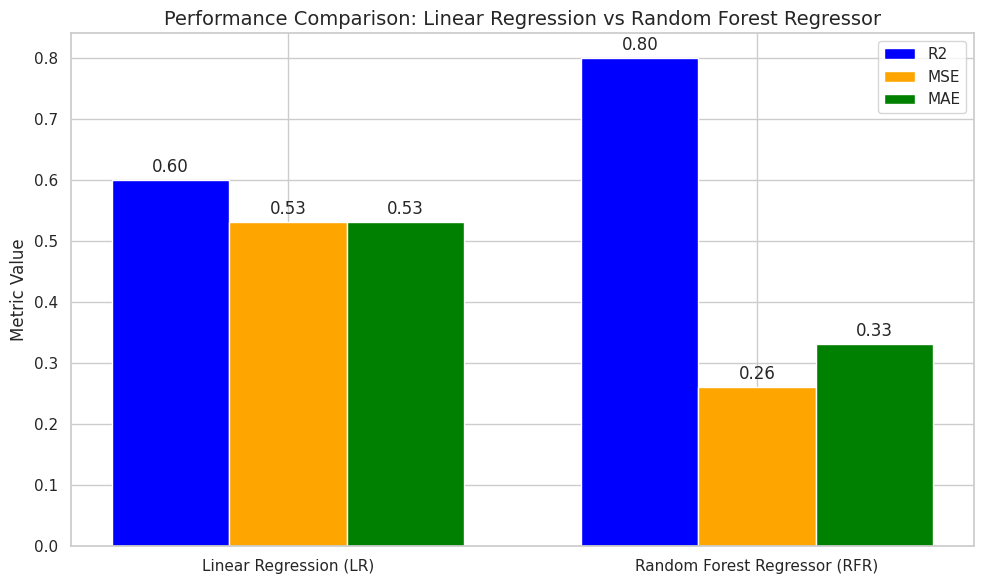

'\nTo extend this bar plot comparison to all four models (LR, RFR, KN, SVR), you can follow these steps:\n1. Include the metrics for K-Nearest Neighbors (KN) and Support Vector Regressor (SVR) in the `metrics` dictionary.\n2. Update the X-axis labels to include all four models.\n3. Use the same grouped bar plot format to visualize the results for all models.\n\nThis will provide a comprehensive visual comparison of model performance across key metrics.\n'

In [121]:
# Bar Plot Comparison: Linear Regression (LR) vs Random Forest Regressor (RFR)

"""
In this section, we will visualize the performance of Linear Regression (LR) and Random Forest Regressor (RFR)
using a bar plot. Bar plots are an effective way to compare models across multiple metrics (R2, MSE, MAE).

### Key Metrics for Visualization:
- **R2 (R-squared)**: Higher values indicate better performance.
- **MSE (Mean Squared Error)**: Lower values indicate better performance.
- **MAE (Mean Absolute Error)**: Lower values indicate better performance.

We will create a grouped bar plot to compare LR and RFR. This approach can be extended to include all four models
(LR, RFR, KN, SVR) for a comprehensive visual comparison.
"""

# Metrics for LR and RFR
metrics = {
    "Model": ["Linear Regression (LR)", "Random Forest Regressor (RFR)"],
    "R2": [LR_metrics["R2"], RFR_metrics["R2"]],
    "MSE": [LR_metrics["MSE"], RFR_metrics["MSE"]],
    "MAE": [LR_metrics["MAE"], RFR_metrics["MAE"]]
}

# Convert metrics to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Create a grouped bar plot
x = np.arange(len(metrics_df))  # X-axis positions for the groups
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
bars_r2 = ax.bar(x - width, metrics_df["R2"], width, label="R2", color="blue")
bars_mse = ax.bar(x, metrics_df["MSE"], width, label="MSE", color="orange")
bars_mae = ax.bar(x + width, metrics_df["MAE"], width, label="MAE", color="green")

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Model"])
ax.set_ylabel("Metric Value")
ax.set_title("Performance Comparison: Linear Regression vs Random Forest Regressor", fontsize=14)
ax.legend()

# Add annotations for bar values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha="center", va="bottom")

annotate_bars(bars_r2)
annotate_bars(bars_mse)
annotate_bars(bars_mae)

plt.tight_layout()
plt.show()

# Suggestion for Extending the Visualization
"""
To extend this bar plot comparison to all four models (LR, RFR, KN, SVR), you can follow these steps:
1. Include the metrics for K-Nearest Neighbors (KN) and Support Vector Regressor (SVR) in the `metrics` dictionary.
2. Update the X-axis labels to include all four models.
3. Use the same grouped bar plot format to visualize the results for all models.

This will provide a comprehensive visual comparison of model performance across key metrics.
"""

### K-Nearest Neighbors Regressor (KN)

In [ ]:
# K-Nearest Neighbors Regressor: All Steps in One Shot

"""
In this section, we will train a K-Nearest Neighbors Regressor (KN), perform hyperparameter tuning using GridSearchCV,
and evaluate its performance on both the training and test datasets. The results will be stored in a dictionary
named `KN_metrics` for easy reference.
"""

# Step 1: Initialize the K-Nearest Neighbors Regressor
kn_model = KNeighborsRegressor()

# Step 2: Define a grid of hyperparameters for tuning
param_grid_kn = {
    "n_neighbors": [3, 5, 7, 10],         # Number of neighbors to consider
    "weights": ["uniform", "distance"],   # Weighting scheme for neighbors
    "p": [1, 2]                           # Distance metric (1: Manhattan, 2: Euclidean)
}

# Step 3: Perform Grid Search with cross-validation
grid_search_kn = GridSearchCV(
    estimator=kn_model,
    param_grid=param_grid_kn,
    scoring="r2",           # Use R-squared as the evaluation metric
    cv=5,                   # 5-fold cross-validation
    verbose=1,              # Display progress
    n_jobs=-1               # Use all available CPU cores
)

# Fit the Grid Search on the training data
grid_search_kn.fit(X_train, y_train)

# Step 4: Extract the Best Model and Parameters
best_kn_model = grid_search_kn.best_estimator_
print("\nBest Hyperparameters Found by GridSearchCV for KNN:")
print(grid_search_kn.best_params_)

# Step 5: Make Predictions on the Test Dataset
y_pred_kn = best_kn_model.predict(X_test)

# Step 6: Evaluate the Model Using Regression Metrics
# accuracy_metrics_regression()

# Store metrics in a dictionary
KN_metrics = accuracy_metrics_regression(best_kn_model, y_test, y_pred_kn)

# Display the metrics
print("\nPerformance Metrics for the K-Nearest Neighbors Regressor on the Test Dataset:")
pprint(KN_metrics)

### Support Vector Regressor (SVR)

In [ ]:
# Support Vector Regressor: All Steps in One Shot

"""
In this section, we will train a Support Vector Regressor (SVR), perform hyperparameter tuning using GridSearchCV,
and evaluate its performance on both the training and test datasets. The results will be stored in a dictionary
named `SVR_metrics` for easy reference.
"""

# Step 1: Initialize the Support Vector Regressor
svr_model = SVR()

# Step 2: Define a grid of hyperparameters for tuning
param_grid_svr = {
    "C": [0.1, 1, 10],                  # Regularization parameter
    "kernel": ["linear", "rbf"],        # Kernel type
    "gamma": ["scale", "auto"]          # Kernel coefficient
}

# Step 3: Perform Grid Search with cross-validation
grid_search_svr = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid_svr,
    scoring="r2",           # Use R-squared as the evaluation metric
    cv=5,                   # 5-fold cross-validation
    verbose=1,              # Display progress
    n_jobs=-1               # Use all available CPU cores
)

# Fit the Grid Search on the training data
grid_search_svr.fit(X_train, y_train)

# Step 4: Extract the Best Model and Parameters
best_svr_model = grid_search_svr.best_estimator_
print("\nBest Hyperparameters Found by GridSearchCV for SVR:")
print(grid_search_svr.best_params_)

# Step 5: Make Predictions on the Test Dataset
y_pred_svr = best_svr_model.predict(X_test)

# Step 6: Evaluate the Model Using Regression Metrics
# accuracy_metrics_regression()

# Store metrics in a dictionary
SVR_metrics = accuracy_metrics_regression(best_svr_model, y_test, y_pred_svr)

# Display the metrics
print("\nPerformance Metrics for the Support Vector Regressor on the Test Dataset:")
pprint(SVR_metrics)

In [136]:
notebook_structure

{'Title': 'scikit-learn (Part 1) - Regression',
 'Sections': {'1. Datasets': {'Description': 'Explore scikit-learn datasets for regression problems.',
   'Subsections': {'Toy Dataset': 'Diabetes Dataset (load_diabetes): A small dataset with 10 features for predicting disease progression.',
    'Real-World Dataset': 'California Housing (fetch_california_housing): A larger dataset for predicting median house prices.'}},
  '2. Problem Definition': 'Define the regression problem to be solved.',
  '3. Features and Target Variables': 'Identify independent features (X) and the dependent target variable (y).',
  '4. Data Preprocessing & EDA': 'Clean and prepare the data for modeling (e.g., handling missing values, scaling).',
  '5. Split Data': 'Divide the dataset into training and testing subsets for model evaluation.',
  '6. Select Estimator (Model)': {'Description': 'Choose an appropriate regression model from scikit-learn.',
   'Details': "Use `get_params()` to inspect the model's hyperpar

### 12. Save the best model



In [124]:
# Save the Best Model Using Pickle

"""
In this section, we will save the best Random Forest Regressor model (`best_rfr_model`) using the `pickle` library.
Saving the model allows us to reuse it later without retraining, which is particularly useful for deploying models
or sharing them with others.

### Key Concepts:
- **Serialization**: The process of converting a Python object (e.g., a trained model) into a byte stream so it can be saved to a file.
- **Deserialization**: The reverse process of loading the saved model back into memory.
- **Pickle**: A Python library used for serializing and deserializing objects.

We will save the model to a file named `best_rfr_model.pkl`.
"""

import pickle

# Step 1: Save the Best Model to a File
model_filename = "best_rfr_model.pkl"  # File name for the saved model

with open(model_filename, "wb") as file:  # Open file in binary write mode
    pickle.dump(best_rfr_model, file)  # Serialize and save the model

print(f"Best Random Forest Regressor model has been saved to '{model_filename}'.")

# Optional: Verify by Loading the Model Back
"""
To ensure the model was saved correctly, we can load it back using `pickle.load()` and verify its functionality.
"""

# Load the model from the file
with open(model_filename, "rb") as file:  # Open file in binary read mode
    loaded_model = pickle.load(file)  # Deserialize and load the model

# Verify the loaded model by making predictions
y_pred_loaded = loaded_model.predict(X_test)

# Compare predictions from the loaded model with the original predictions
print("\nVerification: Predictions from Loaded Model Match Original Predictions:")
print("First 5 Predictions from Original Model:", y_pred_rfr[:5])
print("First 5 Predictions from Loaded Model:  ", y_pred_loaded[:5])

# Check if predictions match
predictions_match = (y_pred_rfr == y_pred_loaded).all()
print("\nDo Predictions Match?", predictions_match)

Best Random Forest Regressor model has been saved to 'best_rfr_model.pkl'.

Verification: Predictions from Loaded Model Match Original Predictions:
First 5 Predictions from Original Model: [0.47809   0.74566   4.8298161 2.61482   2.3314   ]
First 5 Predictions from Loaded Model:   [0.47809   0.74566   4.8298161 2.61482   2.3314   ]

Do Predictions Match? True


### 13. Make a gradio app with our best model

In [125]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00


In [126]:
# Gradio App: Predict House Prices Using the Best Random Forest Regressor Model

"""
In this section, we will create a simple Gradio app to use the trained Random Forest Regressor model (`best_rfr_model`)
for predicting house prices. The app will allow users to input feature values (e.g., median income, house age)
and receive predictions in real time.

### Key Features:
- **Input Fields**: Users can input feature values corresponding to the California Housing dataset.
- **Prediction**: The app uses the trained model to predict the median house value based on the inputs.
- **User-Friendly Interface**: Gradio provides an intuitive and interactive web interface.
"""

import pickle
import gradio as gr
import numpy as np

# Step 1: Load the Saved Model
model_filename = "best_rfr_model.pkl"  # File name of the saved model

with open(model_filename, "rb") as file:  # Open file in binary read mode
    loaded_model = pickle.load(file)  # Deserialize and load the model

print("Model loaded successfully!")

# Step 2: Define the Prediction Function
def predict_house_price(med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude):
    """
    A function to predict the median house value using the trained model.

    Parameters:
    - med_inc: Median income in block group.
    - house_age: Median house age in block group.
    - ave_rooms: Average number of rooms per household.
    - ave_bedrms: Average number of bedrooms per household.
    - population: Population in block group.
    - ave_occup: Average number of household members.
    - latitude: Latitude of the block group.
    - longitude: Longitude of the block group.

    Returns:
    - Predicted median house value.
    """
    # Create a feature array from the inputs
    features = np.array([[med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude]])

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(features)

    return round(prediction[0], 2)

# Step 3: Define Input and Output Components for Gradio
# Define input components (sliders and number inputs for each feature)
inputs = [
    gr.Slider(label="Median Income (MedInc)", minimum=0.5, maximum=15, step=0.1, value=3.5),
    gr.Slider(label="House Age (HouseAge)", minimum=1, maximum=52, step=1, value=20),
    gr.Slider(label="Average Rooms (AveRooms)", minimum=1, maximum=140, step=1, value=6),
    gr.Slider(label="Average Bedrooms (AveBedrms)", minimum=0.1, maximum=34, step=0.1, value=1.0),
    gr.Slider(label="Population", minimum=3, maximum=35682, step=100, value=1000),
    gr.Slider(label="Average Occupancy (AveOccup)", minimum=0.1, maximum=1243, step=1, value=3),
    gr.Slider(label="Latitude", minimum=32, maximum=42, step=0.01, value=37.5),
    gr.Slider(label="Longitude", minimum=-124, maximum=-114, step=0.01, value=-122.5)
]

# Define output component (predicted median house value)
outputs = gr.Textbox(label="Predicted Median House Value")

# Step 4: Create and Launch the Gradio Interface
# Create the Gradio interface
app = gr.Interface(
    fn=predict_house_price,  # Function to call for predictions
    inputs=inputs,           # Input components
    outputs=outputs,         # Output component
    title="California Housing Price Predictor - Created by Pejman",
    description="Enter feature values to predict the median house value using a trained Random Forest Regressor model."
)

# Launch the app
app.launch()

Model loaded successfully!
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c1c132890994b97573.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### 14. Students Task

In [137]:
# Closing Remarks and Students Task

"""
Congratulations! You have successfully completed this notebook on solving a regression problem using scikit-learn (This is Pejman :)).
We covered the entire machine learning pipeline, including:
- Exploring datasets (e.g., California Housing dataset).
- Preprocessing data (handling missing values, scaling, etc.).
- Splitting data into training and testing sets.
- Training and evaluating regression models (Linear Regression, Random Forest Regressor, etc.).
- Hyperparameter tuning using GridSearchCV.
- Saving the best model using `pickle`.
- Deploying the model with a simple Gradio app.

### Key Takeaways:
1. **Regression vs Classification**: This notebook focused on a regression problem where the target variable is continuous.
   In classification problems, the target variable is categorical, and the evaluation metrics differ (e.g., accuracy, precision, recall, F1-score).
2. **Model Evaluation**: Always use appropriate metrics for the problem type. For regression, we used R2, MSE, and MAE.
   For classification, you will use metrics like accuracy, confusion matrix, ROC-AUC, etc.

### Your Task:
Follow this notebook as a template and apply the same workflow to a **classification problem** using a dataset from scikit-learn.
Here are some suggestions:
- Use the `load_iris` or `load_digits` dataset for classification.
- Follow the same steps: preprocessing, splitting, training, evaluation, and hyperparameter tuning.
- Explore different classification models such as KNeighborsClassifier, SVC, Random Forest Classifier, etc.
- Use appropriate classification metrics (e.g., confusion matrix, accuracy, precision, recall, F1-score) to evaluate your model.

### Additional Practice:
To deepen your understanding of regression problems:
1. Explore other regression datasets from scikit-learn or Kaggle (e.g., Boston Housing, Ames Housing).
2. Experiment with advanced algorithms like **XGBoost** , "CatBoost", or **LightGBM**, which are powerful tools for both regression and classification tasks.
3. Research the strengths of XGBoost:
   - Handles missing values effectively.
   - Provides built-in regularization to prevent overfitting.
   - Supports parallel processing for faster training.
4. Compare the performance of XGBoost with traditional models like Random Forest and Linear Regression.

By completing these tasks, you will gain hands-on experience in both regression and classification problems and become familiar with state-of-the-art techniques like XGBoost.

Good luck, and happy learning!

Pejman
"""

'\nCongratulations! You have successfully completed this notebook on solving a regression problem using scikit-learn (This is Pejman :)).\nWe covered the entire machine learning pipeline, including:\n- Exploring datasets (e.g., California Housing dataset).\n- Preprocessing data (handling missing values, scaling, etc.).\n- Splitting data into training and testing sets.\n- Training and evaluating regression models (Linear Regression, Random Forest Regressor, etc.).\n- Hyperparameter tuning using GridSearchCV.\n- Saving the best model using `pickle`.\n- Deploying the model with a simple Gradio app.\n\n### Key Takeaways:\n1. **Regression vs Classification**: This notebook focused on a regression problem where the target variable is continuous.\n   In classification problems, the target variable is categorical, and the evaluation metrics differ (e.g., accuracy, precision, recall, F1-score).\n2. **Model Evaluation**: Always use appropriate metrics for the problem type. For regression, we use

### Main source and more practice
* https://scikit-learn.org/stable/index.html